In [1]:
import pandas as pd                     #import libraries 
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv("netflix_titles.csv")    #load data set

In [3]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [4]:
df.head(4)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."


In [10]:
df = df.dropna(subset=['type', "release_year", "rating", "country", "duration"])  #clean data 

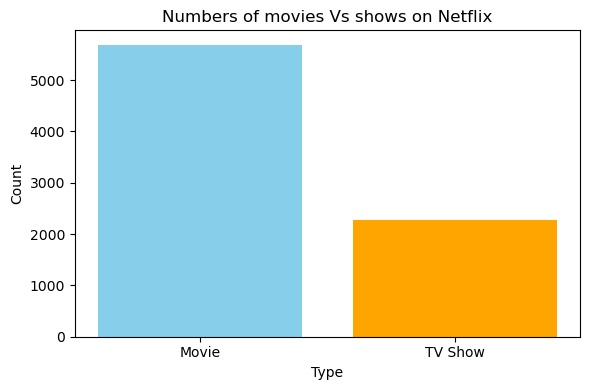

In [14]:
type_count = df['type'].value_counts()
plt.figure(figsize=(6,4))
plt.bar(type_count.index, type_count.values, color=["skyblue","orange"])
plt.title("Numbers of movies Vs shows on Netflix")
plt.xlabel("Type")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig("tvshows_Vs_Movies")
plt.show()

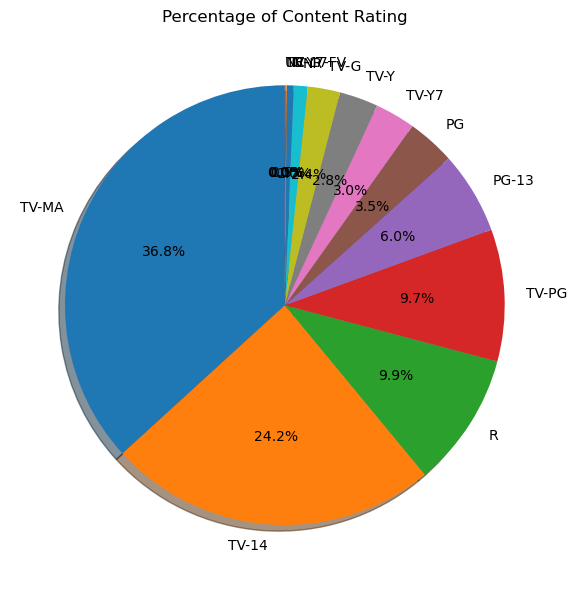

In [18]:
rating_count = df['rating'].value_counts()

plt.figure(figsize=(8,6))
plt.pie(rating_count, labels= rating_count.index, autopct="%1.1f%%", startangle=90, shadow=True)
plt.title("Percentage of Content Rating")
plt.tight_layout()
plt.savefig("conten_rating.png")
plt.show()

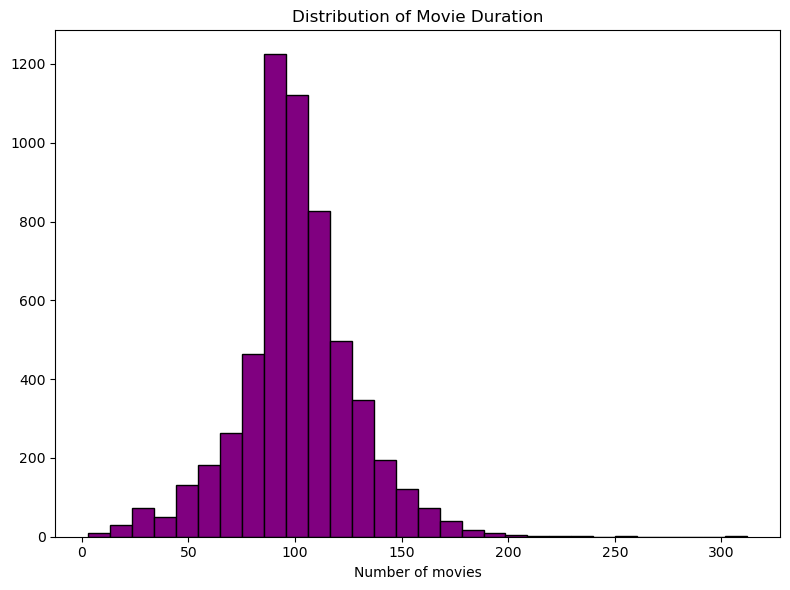

In [21]:
movies_df = df[df['type'] == "Movie"].copy()
movies_df["duration_int"] = movies_df['duration'].str.replace("min", "").astype(int)

plt.figure(figsize=(8,6))
plt.hist(movies_df["duration_int"], bins=30, color="purple", edgecolor="black")
plt.title("Distribution of Movie Duration")
plt.xlabel("Duration (minutes)")
plt.xlabel("Number of movies")
plt.tight_layout()
plt.savefig("movie_duration_histogram.png")
plt.show()

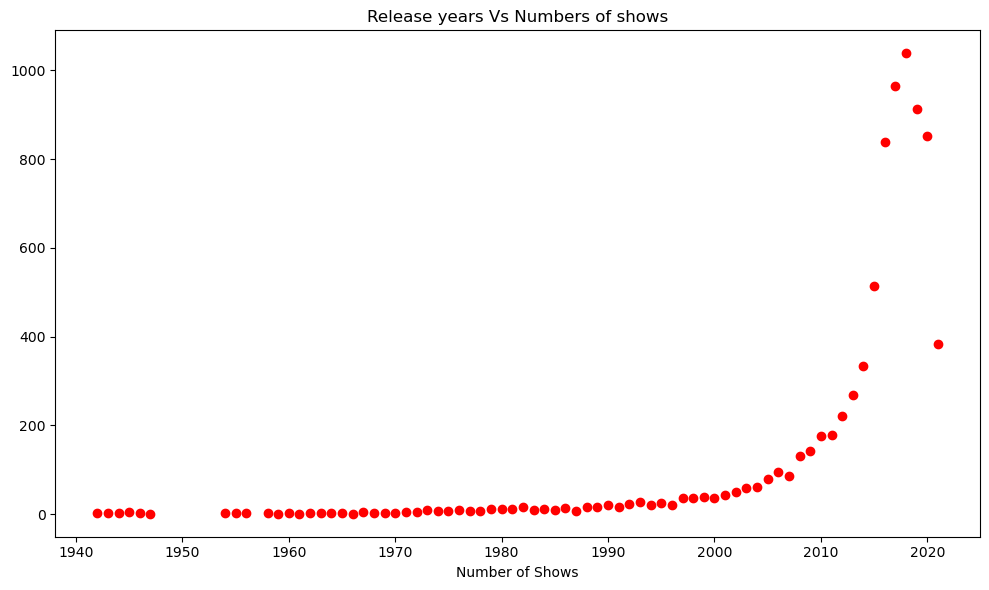

In [22]:
release_count = df['release_year'].value_counts().sort_index()
plt.figure(figsize=(10,6))
plt.scatter(release_count.index, release_count.values, color="red")
plt.title("Release years Vs Numbers of shows")
plt.xlabel("Release Year")
plt.xlabel("Number of Shows")
plt.tight_layout()
plt.savefig("release_year_scatter.png")
plt.show()

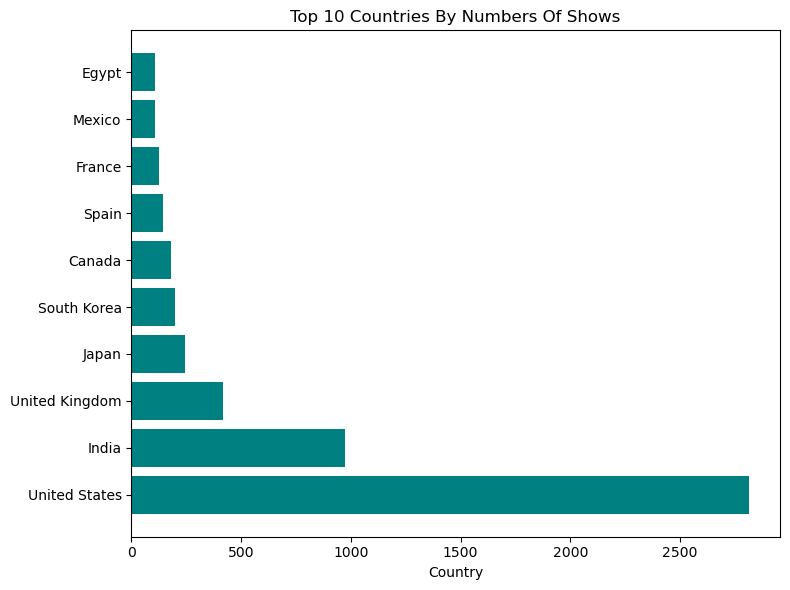

In [23]:
country_counts = df['country'].value_counts().head(10)
plt.figure(figsize=(8,6))
plt.barh(country_counts.index, country_counts.values, color="teal")
plt.title("Top 10 Countries By Numbers Of Shows")
plt.xlabel("Numbers of Shows")
plt.xlabel("Country")
plt.tight_layout()
plt.savefig("Top10_countries.png")
plt.show()

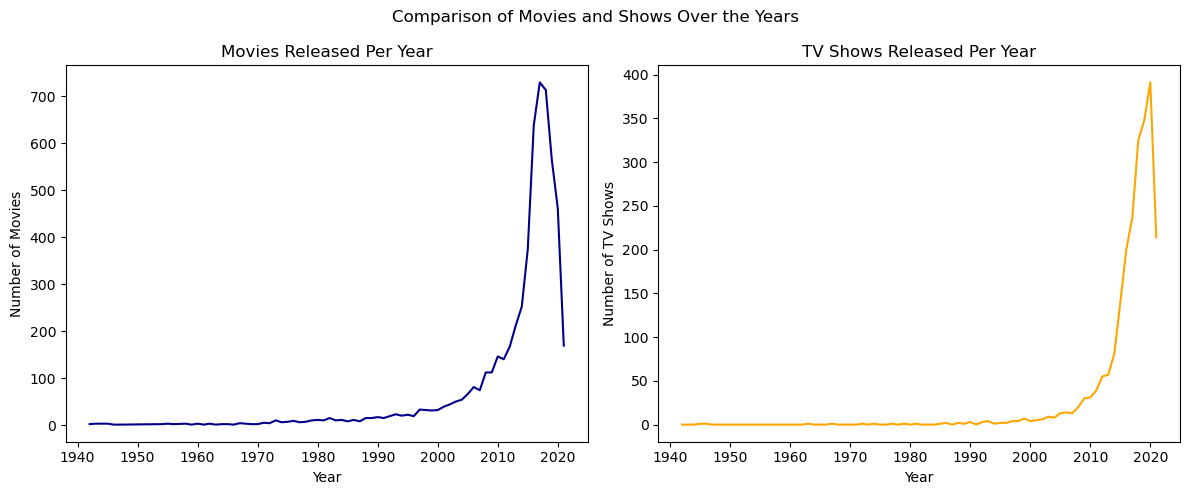

In [26]:
content_by_year = df.groupby(["release_year", "type"]).size().unstack().fillna(0)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))  # s -> subplots hona chahiye tha

# First Subplot - Movies
ax[0].plot(content_by_year.index, content_by_year["Movie"], color="Darkblue")
ax[0].set_title("Movies Released Per Year")
ax[0].set_xlabel("Year")
ax[0].set_ylabel("Number of Movies")

# Second Subplot - TV Shows
ax[1].plot(content_by_year.index, content_by_year["TV Show"], color="Orange")
ax[1].set_title("TV Shows Released Per Year")
ax[1].set_xlabel("Year")
ax[1].set_ylabel("Number of TV Shows")

# Figure Title
fig.suptitle("Comparison of Movies and Shows Over the Years")

plt.tight_layout()
plt.savefig("Movies_TVShows_comparison.png")
plt.show()
